# CO542 - Neural Networks and Fuzzy Systems
## E/19/129 - K.H. Gunawardana

### Lab 09: Fuzzy rule-based decision system

Boy A Matching Percentage: 58.13


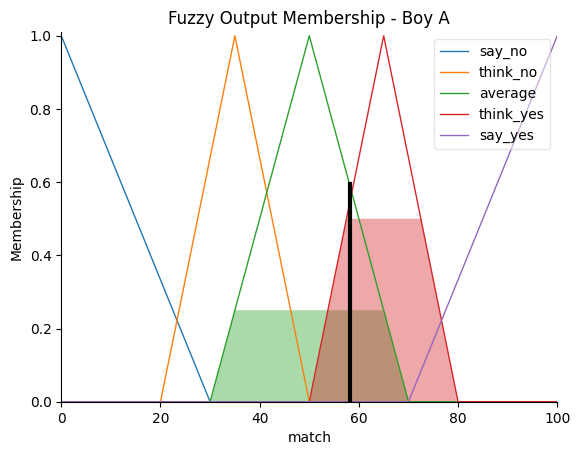

Boy B Matching Percentage: 55.45


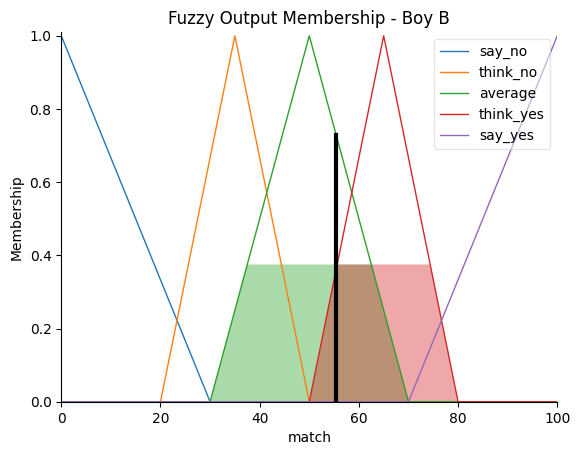

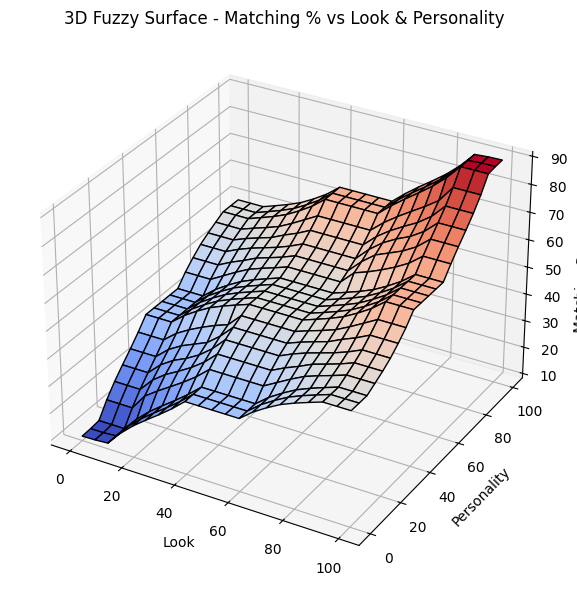

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# -----------------------------
# 1. Define Input and Output Variables
# -----------------------------
look = ctrl.Antecedent(np.arange(0, 101, 1), 'look')
personality = ctrl.Antecedent(np.arange(0, 101, 1), 'personality')
match = ctrl.Consequent(np.arange(0, 101, 1), 'match')

# -----------------------------
# 2. Define Membership Functions
# -----------------------------
# Look
look['bad'] = fuzz.trimf(look.universe, [0, 0, 40])
look['okay'] = fuzz.trimf(look.universe, [10, 50, 90])
look['good'] = fuzz.trimf(look.universe, [60, 100, 100])

# Personality
personality['bad'] = fuzz.trimf(personality.universe, [0, 0, 40])
personality['okay'] = fuzz.trimf(personality.universe, [10, 50, 90])
personality['good'] = fuzz.trimf(personality.universe, [60, 100, 100])

# Matching Percentage
match['say_no'] = fuzz.trimf(match.universe, [0, 0, 30])
match['think_no'] = fuzz.trimf(match.universe, [20, 35, 50])
match['average'] = fuzz.trimf(match.universe, [30, 50, 70])
match['think_yes'] = fuzz.trimf(match.universe, [50, 65, 80])
match['say_yes'] = fuzz.trimf(match.universe, [70, 100, 100])

# -----------------------------
# 3. Define Fuzzy Rules
# -----------------------------
rules = [
    ctrl.Rule(look['bad'] & personality['bad'], match['say_no']),
    ctrl.Rule(look['bad'] & personality['okay'], match['think_no']),
    ctrl.Rule(look['bad'] & personality['good'], match['average']),
    ctrl.Rule(look['okay'] & personality['bad'], match['think_no']),
    ctrl.Rule(look['okay'] & personality['okay'], match['average']),
    ctrl.Rule(look['okay'] & personality['good'], match['think_yes']),
    ctrl.Rule(look['good'] & personality['bad'], match['average']),
    ctrl.Rule(look['good'] & personality['okay'], match['think_yes']),
    ctrl.Rule(look['good'] & personality['good'], match['say_yes'])
]

# -----------------------------
# 4. Build Control System
# -----------------------------
system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system)

# -----------------------------
# 5. Test Case: Boy A (Look = 40, Personality = 80)
# -----------------------------
sim.input['look'] = 40
sim.input['personality'] = 80
sim.compute()
print("Boy A Matching Percentage:", round(sim.output['match'], 2))

match.view(sim=sim)
plt.title("Fuzzy Output Membership - Boy A")
plt.show()

# -----------------------------
# 6. Test Case: Boy B (Look = 75, Personality = 40)
# -----------------------------
sim.input['look'] = 75
sim.input['personality'] = 40
sim.compute()
print("Boy B Matching Percentage:", round(sim.output['match'], 2))

match.view(sim=sim)
plt.title("Fuzzy Output Membership - Boy B")
plt.show()

# -----------------------------
# 7. Optional: 3D Surface Plot of Output
# -----------------------------
look_range = np.arange(0, 101, 5)
personality_range = np.arange(0, 101, 5)
output_surface = np.zeros((len(personality_range), len(look_range)))

# Rebuild simulation for plotting
sim_surface = ctrl.ControlSystemSimulation(system)

for i, p in enumerate(personality_range):
    for j, l in enumerate(look_range):
        sim_surface.input['look'] = l
        sim_surface.input['personality'] = p
        sim_surface.compute()
        output_surface[i, j] = sim_surface.output['match']

# Plotting the 3D surface
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(look_range, personality_range)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, output_surface, cmap='coolwarm', edgecolor='k')
ax.set_xlabel('Look')
ax.set_ylabel('Personality')
ax.set_zlabel('Matching Percentage')
plt.title("3D Fuzzy Surface - Matching % vs Look & Personality")
plt.tight_layout()
plt.show()
